<a href="https://colab.research.google.com/github/brendanbautista/is_4487_base/blob/main/Labs/Scripts/lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 14

## Outline

1. Import customer reviews
2. Create prompts for LLM (ChatGPT)
3. Summarize Customer Reviews

*Important note:*
You will use the API key from the Canvas assignment for your work, but you must NOT save it in your public GitHub repository.  It will quickly be found and used, draining my budget!

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Install and Load Libraries

In [1]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.7/309.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [2]:
pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 991.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00


In [3]:
import os
from openai import OpenAI
import pandas as pd
from itables import show

##Set the API Key Temporarily
Remember to remove it before saving to GitHub

In [34]:

client=OpenAI(
    api_key = ""
)

##Get Reviews

In [6]:
reviews_data = {
    'Date': ['2023-12-01', '2023-12-03', '2023-12-05', '2023-12-08', '2023-12-10', '2023-12-12', '2023-12-15', '2023-12-18', '2023-12-20', '2023-12-22'],
    'Stars': [4, 3, 5, 4, 2, 5, 3, 4, 1, 5],
    'Review': [
        "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.",
        "My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars.",
        "Megatelco offers top-notch phones! I'm thrilled with the features and the smooth interface. The camera takes stunning photos, and the battery lasts all day. 5 stars without a doubt!",
        "I've been using Megatelco phones for a while now, and they never disappoint. The latest model I purchased is no exception. Great performance, stylish design, and excellent customer service. 4 stars from a satisfied customer.",
        "Regrettably, my experience with Megatelco was not as expected. The phone had constant connectivity issues, and the support team couldn't provide a solution. Disappointed and only giving it 2 stars.",
        "Megatelco's latest phone exceeded my expectations! It's packed with innovative features, and the customer service team was quick to address a minor concern I had. Solid 5-star rating!",
        "I had a mixed experience with Megatelco. The phone's performance is decent, but I encountered some software glitches. Customer support was responsive but couldn't entirely resolve the issue. 3 stars.",
        "Megatelco phones are reliable and offer great value. The user-friendly interface, coupled with impressive features, makes them a top choice. I'm giving it 4 stars for its overall quality.",
        "My Megatelco phone started malfunctioning within a week of purchase. The touch screen became unresponsive, and customer support was unable to provide a quick solution. Unfortunately, a 1-star rating.",
        "I recently upgraded to the latest Megatelco phone, and it's fantastic! The speed, camera quality, and battery life are exceptional. The sleek design is a bonus. Easy 5 stars!"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(reviews_data)
show(df)
print(df['Review'].iloc[:1])

0    I purchased a Megatelco phone last week, and I...
Name: Review, dtype: object


##Create Prompts and Send to Model

In [20]:
review = df['Review'].values[1]
print(review)
messages = [{"role":"system","content":"Summarize the sentiment and most important points in two words or less in the following user review for a phone company named Megatelco.  Format the output in a table."}]
messages.append({"role":"user", "content":review})
print(messages)

My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars.
[{'role': 'system', 'content': 'Summarize the sentiment and most important points in two words or less in the following user review for a phone company named Megatelco.  Format the output in a table.'}, {'role': 'user', 'content': "My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars."}]


In [21]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages = messages,
    max_tokens = 250
)

## Display Response

In [22]:
print(response.choices[0].message.content)

| Prompt delivery | Software issues | Lagging | User experience | Customer support | Expected better | 3 stars |


## Create a Loop to Submit Reviews

➡️ Assignment Tasks
- Create a FOR loop to iterate through reviews
- Collect the responses in a single datafram

In [29]:
# Assuming df is your DataFrame with reviews
reviews = df['Review'].tolist()

# List to hold responses
responses = []

# Iterate through each review
for review in reviews:
    messages = [
        {"role": "system", "content": "Summarize the sentiment and most important points in two words or less in the following user review for a phone company named Megatelco.  Ensure the output is in a clean output that is friendly for users viewing the html format. The Summary output should be two words or less."},
        {"role": "user", "content": review}
    ]

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=250
    )

    # Collect response
    if response and response.choices:
        summary = response.choices[0].message.content  # Accessing the content attribute correctly
        responses.append(summary)
    else:
        responses.append("No response")

# Create a DataFrame from the responses
response_df = pd.DataFrame({
    'Review': reviews,
    'Summary': responses
})

# Display the DataFrame
print(response_df)

                                              Review  \
0  I purchased a Megatelco phone last week, and I...   
1  My Megatelco phone arrived promptly, but I've ...   
2  Megatelco offers top-notch phones! I'm thrille...   
3  I've been using Megatelco phones for a while n...   
4  Regrettably, my experience with Megatelco was ...   
5  Megatelco's latest phone exceeded my expectati...   
6  I had a mixed experience with Megatelco. The p...   
7  Megatelco phones are reliable and offer great ...   
8  My Megatelco phone started malfunctioning with...   
9  I recently upgraded to the latest Megatelco ph...   

                                             Summary  
0                             Impressed with quality  
1                                     Mixed feelings  
2                                 Thrilled customer!  
3                                Satisfied customer.  
4                      Negative, connectivity issues  
5                              Exceeded expectations 

## Summarize the Responses

➡️ Assignment Tasks
- Create at least two visualizations to show the most important themes and sentinment of the reviews

In [ ]:
#themes

In [ ]:
#sentiment frequency

In [30]:
pip install matplotlib seaborn wordcloud nltk


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import pandas as pd

<ipython-input-32-b91fdab1d20d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stars', palette='viridis')


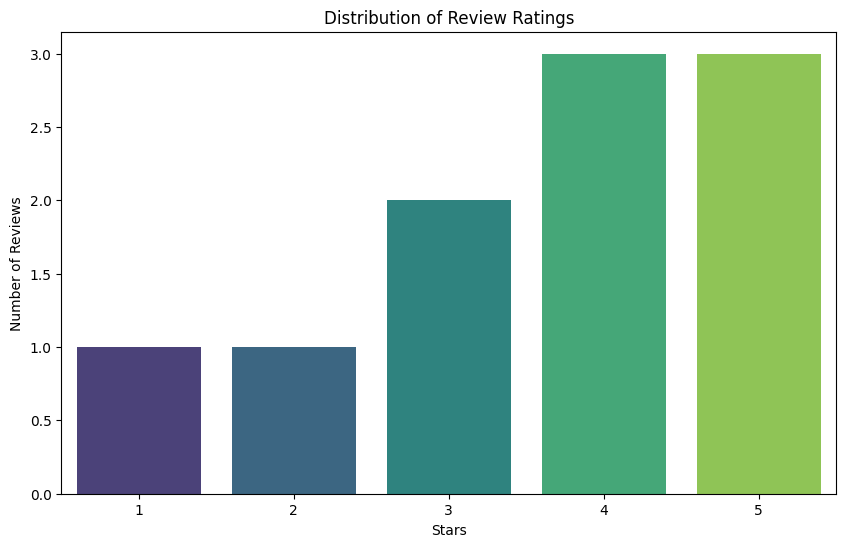

In [32]:
def plot_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Stars', palette='viridis')
    plt.title('Distribution of Review Ratings')
    plt.xlabel('Stars')
    plt.ylabel('Number of Reviews')
    plt.show()

# Assuming 'df' is your DataFrame
plot_sentiment_distribution(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


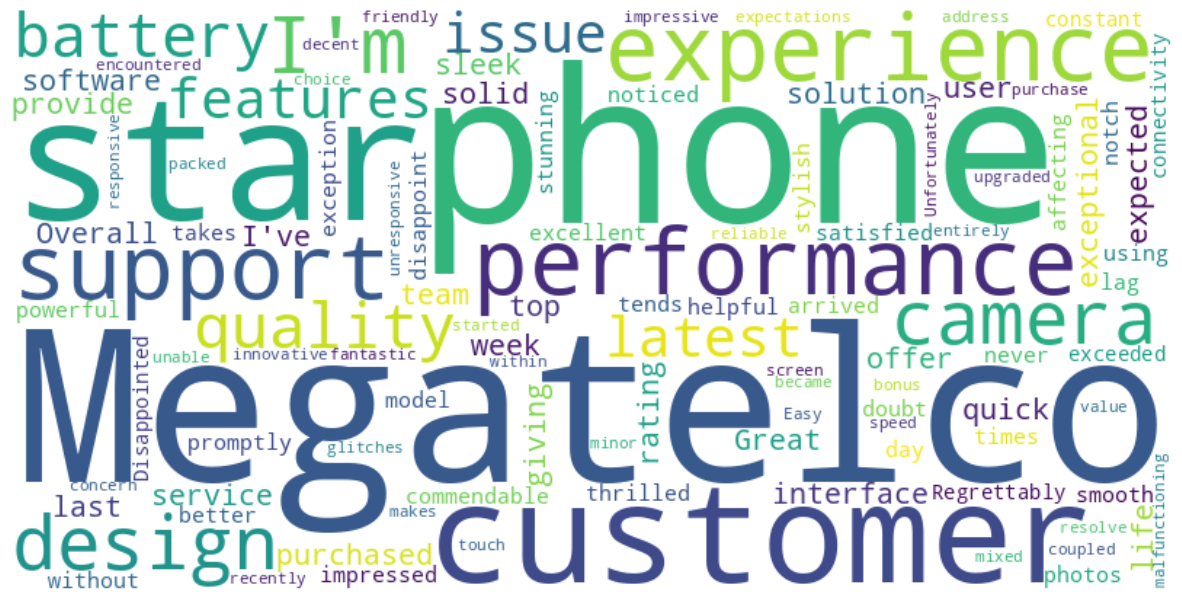

In [33]:
def create_word_cloud(text):
    # Combine all reviews into one large text
    long_text = ' '.join(text)

    # Set stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english')) # add any custom stopwords if needed

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords=stop_words, collocations=False).generate(long_text)

    # Display the word cloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming 'df' is your DataFrame and 'Review' is the column with text
create_word_cloud(df['Review'])
